In [1]:
pip install --upgrade pip

Requirement already up-to-date: pip in c:\bigdata\anaconda3\lib\site-packages (20.2.4)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import os
import inspect
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns
import tqdm
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from bs4 import BeautifulSoup
import urllib.request
import re
import time
import csv
import json
import ssl


from konlpy.tag import Okt
from collections import Counter

from konlpy.tag import Kkma
from konlpy.utils import pprint
from konlpy.tag import Okt
from collections import Counter

from PIL import Image

from matplotlib import rc

In [2]:
#창켜기
driver = webdriver.Chrome('./chromedriver/chromedriver.exe')
driver.get('http://www.foodsafetykorea.go.kr/portal/specialinfo/searchInfoProduct.do?menu_grp=MENU_NEW04&menu_no=2815')
time.sleep(3)

In [3]:
#검색창 이동
driver.find_element_by_xpath('//*[@id="prd_cd_nm"]').click()
time.sleep(3)

In [4]:
#탁주 검색
driver.find_element_by_name('prd_cd_nm').send_keys('탁주')
driver.find_element_by_xpath('//*[@id="srchBtn"]').click()

In [5]:
driver.find_element_by_xpath('//*[@id="sp_list_cnt"]').click()

In [6]:
driver.find_element_by_xpath('//*[@id="contents"]/div[2]/div[2]/div[5]/ul/li[5]/a').click()

In [10]:
total_data_2 = []

for i in range (46) : 
    name = driver.find_elements_by_css_selector('tr td.tl a')
    
    for n in name : 
        n.send_keys(Keys.ENTER)
        time.sleep(2)
    
        info = driver.find_element_by_css_selector("div > section > div.list-container > div.fcs_ddt > table:nth-child(2) > tbody> tr > td:nth-child(4)")
        info1 = driver.find_element_by_css_selector("div > section > div.list-container > div.fcs_ddt > table:nth-child(4) > tbody> tr:nth-child(2) > td:nth-child(2)")
        info2 = driver.find_element_by_css_selector("div > section > div.list-container > div.fcs_ddt > table:nth-child(4) > tbody> tr:nth-child(2) > td:nth-child(4)")
        info3 = driver.find_element_by_css_selector("div > section > div.list-container > div.fcs_ddt > table:nth-child(4) > tbody> tr:nth-child(4) > td")
        info4 = driver.find_element_by_css_selector("div > section > div.list-container > div.fcs_ddt > table:nth-child(10) > tbody")
    
        data={'소재지':info.text,'제품명':info1.text,'유통기한':info2.text,'제품 형태':info3.text,'성분 및 원료':info4.text}
        total_data_2.append(data)
        time.sleep(2)
    
        driver.find_element_by_css_selector('a.fancybox-item.fancybox-close').click()
        time.sleep(2)
    
    driver.find_element_by_partial_link_text('다음페이지').click()
    time.sleep(30)

KeyboardInterrupt: 

In [11]:
total_data_2

[{'소재지': '강원도 철원군 김화읍 청양리 2889,2889-2(외골길 33-12)',
  '제품명': '초가마카',
  '유통기한': '제조일로부터 1년',
  '제품 형태': '',
  '성분 및 원료': '10 쌀 국내산\n11 효모\n12 액상과당 고과당\n13 젖산\n14 개량누룩\n15 정제효소 정제효소 0.02%\n16 마카분말(페류산) 마카분말(페루산) 0.2\n17 정제수\n18 아스파탐'},
 {'소재지': '전라남도 화순군 동복면 칠정리 706-1(전라남도 화순군 동복면 동복시장길 6)',
  '제품명': '동복生막걸리',
  '유통기한': '제조일로부터 10일',
  '제품 형태': '',
  '성분 및 원료': '1 정제수\n2 쌀가루\n3 소맥분\n4 입국\n5 효모\n6 누룩\n8 아스파탐\n9 젖산'},
 {'소재지': '전라남도 신안군 지도읍 읍내리 123-1(전라남도 신안군 지도읍 서촌길 43)',
  '제품명': '딱 한잔',
  '유통기한': '제조일로부터 20일',
  '제품 형태': '베이지색상의 약간 누런색의 띰',
  '성분 및 원료': '1 정제수\n2 소맥분\n3 입국\n5 누룩\n7 젖산\n8 아스파탐'},
 {'소재지': '경상북도 영덕군 강구면 소월1길 16-10',
  '제품명': '소백산 막걸리',
  '유통기한': '제조일로부터 45일',
  '제품 형태': '특유의 향과 맛이 나는 액상제품',
  '성분 및 원료': '1 정제수\n2 쌀\n3 입국\n4 팽화미\n5 과당 고과당\n6 이소말토올리고당\n7 효모\n8 젖산\n9 정제효소제\n10 조효소제\n11 사카린나트륨\n12 구연산'},
 {'소재지': '전라남도 순천시 가곡동 가곡1길 62',
  '제품명': '흑마늘막걸리',
  '유통기한': '제조일부터 30일',
  '제품 형태': '연한갈색',
  '성분 및 원료': '40 정제수\n41 입국 쌀(국내산), 수입산\n42 팽화미 수입산\n43 흑마늘액 흑마늘 90%\n44 올리고당\n45

In [13]:
df_2 = pd.DataFrame(total_data_2)

In [14]:
df_2.to_excel('C:/Users/CPBUserN/Desktop/막걸리크롤링2.xlsx', encoding='CP949')

In [4]:
mac = pd.read_csv('C:/Users/CPBUserN/Documents/카카오톡 받은 파일/막걸리.csv', encoding='CP949')

In [8]:
mac

,Unnamed: 0,시도,시군구,제품명,유통기한,제품 형태,성분1,성분2,성분3,성분4,...,성분13,성분15,성분17,성분19,성분20,성분21,성분22,성분23,성분24,입국
0,0,경기도,가평군,막이오름,365일,"고유의 색택을 가지고 이미, 이취가 없는 액상",쌀국내산,입국,효모,정제효소제,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1,서울특별시,마포구,서울곡주 오란쥐,60일,탁한 흰색 혹은 미황색 액체,정제수,멥쌀,찹쌀,누룩,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,경기도,용인시,동네방네 수지 막걸리,30일,이미 이취가 없고 고유의 향이 나는 미황색의 액상 제품,정제수,쌀가루,입국쌀,포도당,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,3,충청북도,청주시,청주신선주 백주,30일,미황색의 알코올 성분을 함유한 액체,찹쌀,멥쌀,누룩,건조국화,...,참당귀분말,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,4,강원도,홍천군,고세이 프리미엄 순 쌀막걸리(전량수출용),365일,누룩향이 나는 액상제품,국,효모,밀가루,쌀,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,2210,전라남도,순천시,흑마늘막걸리,30일,연한갈색,정제수,입국쌀(국내산)수입산,팽화미수입산,흑마늘액흑마늘,...,아스파탐감미료페닐알라닌함유,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2211,2211,경상북도,상주시,얼음골 쌀 생 막걸리,30일,맑고 부드러운 액체,정제수,소맥분소맥분,백미백미,전분당,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2212,2212,강원도,횡성군,"국순당막걸리 쌀(동남아시아 수출용),알루미늄캔",450일,"고유의 색택과 향미를 가지고 있고, 이미, 이취가 없음",쌀국내산,정제수,액상과당,효모,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2213,2213,강원도,횡성군,"1000억 막걸리,CAN",365일,"고유의 색택과 향미를 가지고 있고 이미, 이취가 없음",정제수,쌀국내산,기타과당,밀가루국내산,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
mac["입국"] = mac["성분2"].apply(lambda x:1 if x == '입국' else 0)

In [3]:
df1 = pd.read_csv('C:/Users/CPBUserN/Desktop/막걸리_윤진.csv', encoding='CP949')
df2 = pd.read_csv('C:/Users/CPBUserN/Desktop/막걸리_수현맛.csv', encoding='CP949')

In [8]:
df

,번호,시도,시군구,제품명,유통기한,제품 형태,성분1,성분2,성분3,성분4,...,성분24,국,탄산,살균/생,단맛_x,종류(동동주/막걸리/모주),색,과일,단맛_y,주원료
0,0,경기도,가평군,막이오름,365,"고유의 색택을 가지고 이미, 이취가 없는 액상",쌀국내산,입국,효모,정제효소제,...,NaN,입국,탄산,살균,NaN,막걸리,백색,0,"설탕, 기타과당포도당액100",쌀
1,1,서울특별시,마포구,서울곡주오란쥐,60,탁한 흰색 혹은 미황색 액체,정제수,멥쌀,찹쌀,누룩,...,NaN,누룩,일반,살균,NaN,막걸리,미황색,오렌지,0,쌀
2,2,경기도,용인시,동네방네수지막걸리,30,이미 이취가 없고 고유의 향이 나는 미황색의 액상 제품,정제수,쌀가루,입국쌀,포도당,...,NaN,입국,일반,생,NaN,막걸리,미황색,0,"포도당, 아세설팜칼륨, 아스파탐",쌀
3,3,충청북도,청주시,청주신선주백주,30,미황색의 알코올 성분을 함유한 액체,찹쌀,멥쌀,누룩,건조국화,...,NaN,누룩,일반,생,NaN,전통주,미황색,약재,0,쌀
4,4,강원도,홍천군,고세이프리미엄순쌀막걸리(전량수출용),365,누룩향이 나는 액상제품,국,효모,밀가루,쌀,...,NaN,국,일반,살균,NaN,막걸리,백색,0,"올리고당, 아스파탐","씰,밀"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,2210,전라남도,순천시,흑마늘막걸리_순천,30,연한갈색,정제수,입국쌀(국내산)수입산,팽화미수입산,흑마늘액흑마늘,...,NaN,입국,일반,생,NaN,막걸리,연갈색,흑마늘,"올리고당, 포도당, 아스파탐, 아세설팜칼륨",쌀
2203,2211,경상북도,상주시,얼음골쌀생막걸리,30,맑고 부드러운 액체,정제수,소맥분소맥분,백미백미,전분당,...,NaN,종국,일반,생,NaN,막걸리,백색,0,"전분당, 아스파탐, 아세설팜칼륨","씰,밀"
2204,2212,강원도,횡성군,"국순당막걸리쌀(동남아시아수출용),알루미늄캔",450,"고유의 색택과 향미를 가지고 있고, 이미, 이취가 없음",쌀국내산,정제수,액상과당,효모,...,NaN,국,탄산,살균,NaN,막걸리,백색,0,과당,쌀
2205,2213,강원도,횡성군,"천억막걸리,CAN",365,"고유의 색택과 향미를 가지고 있고 이미, 이취가 없음",정제수,쌀국내산,기타과당,밀가루국내산,...,NaN,국,탄산,살균,NaN,막걸리,백색,0,"과당, 올리고당","씰,밀"


In [7]:
df = df1.merge(df2, on='번호')

In [9]:
df.to_csv('C:/Users/CPBUserN/Desktop/합본.csv', encoding='CP949', index=False)

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

In [16]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib

In [213]:
pip install pyclust

  Created wheel for pyclust: filename=pyclust-0.2.0-py3-none-any.whl size=12810 sha256=238c3a120cb3f765571d6b757bb87da4bd4c122633b8e1c9bc510d74b00ca45b
  Stored in directory: c:\users\cpbusern\appdata\local\pip\cache\wheels\d2\f0\e8\66974a70daae12adb25894f145de88ad807763794edcc3b295
Successfully built pyclust
Note: you may need to restart the kernel to use updated packages.


In [218]:
pip install treelib

  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18374 sha256=d6b09f0422ffbda21730614d736d141663e19da9d961be978cf099c02c79e2c3
  Stored in directory: c:\users\cpbusern\appdata\local\pip\cache\wheels\89\be\94\2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib
Note: you may need to restart the kernel to use updated packages.


In [226]:
import pyclust

In [220]:
mac = pd.read_csv('C:/Users/CPBUserN/Desktop/막걸리_최종.csv', encoding='CP949')

In [221]:
name = mac['제품명']

In [222]:
mac = mac.drop('제품명', axis=1)

In [223]:
mac

,유통기한,국,살균,과일,주원료,드라이,신맛,고소한맛,단맛,탄산
0,365,1,11,20,30,41,51,60,72,81
1,60,0,11,21,30,40,51,60,70,80
2,30,1,10,20,30,41,51,60,71,80
3,365,3,11,20,32,41,50,60,71,80
4,30,2,10,20,30,40,51,60,72,80
...,...,...,...,...,...,...,...,...,...,...
1942,30,1,10,21,30,41,50,60,71,80
1943,30,2,10,20,32,41,50,60,71,80
1944,450,3,11,20,30,41,51,60,70,81
1945,365,3,11,20,32,41,50,60,70,81


In [224]:
def eblow_kmd(df, n):
    centroids = []
    for k in range(1, n):
        kdata = data
        kmd = pyclust.KMedoids(n_clusters=k)
        kmd.fit(df.values)
        centroids.append(kmd.centers_)
        kdata['cluster'] = kmd.labels_
        printExcel(kdata, k, False)
    k_euclid = [cdist(df.values, cent) for cent in centroids]
    dist = [np.min(ke, axis=1) for ke in k_euclid]
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(df.values)**2)/df.values.shape[0]
    bss = tss - wcss
    plt.plot(bss)
    plt.show()
    return bss

In [228]:
start_time = time.time()

kmd = pyclust.KMedoids(n_clusters=4, n_trials=50)
kmd.fit(ksample.values)

end_time = time.time()

# print processing time
print('처리시간 : ', end_time - start_time)

ValueError: attempt to get argmin of an empty sequence

In [200]:
from sklearn.preprocessing import scale

mac_scaled = pd.DataFrame(scale(mac),columns=mac.columns)

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
result = scaler.fit_transform(mac)
data_scaled = pd.DataFrame(result, columns=mac.columns)
data_scaled.describe()

,유통기한,국,살균,과일,주원료,드라이,신맛,고소한맛,단맛,탄산
count,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03,1.947000e+03
mean,-5.858109e-16,2.272336e-16,6.092256e-16,3.480752e-15,-1.202485e-15,-8.483769e-16,1.757654e-15,6.561720e-15,-2.989961e-16,8.695664e-15
std,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00,1.000257e+00
min,-5.742363e-01,-1.337579e+00,-5.775480e-01,-6.028643e-01,-7.881592e-01,-1.382141e+00,-1.113780e+00,-2.517009e-01,-5.021319e+00,-4.811435e-01
25%,-3.854476e-01,-7.803973e-01,-5.775480e-01,-6.028643e-01,-7.881592e-01,-1.382141e+00,-1.113780e+00,-2.517009e-01,9.719163e-02,-4.811435e-01
50%,-3.854476e-01,-2.232160e-01,-5.775480e-01,-6.028643e-01,-7.881592e-01,7.235152e-01,8.978432e-01,-2.517009e-01,2.499830e-01,-4.811435e-01
75%,-2.871202e-01,8.911468e-01,5.769550e-01,1.658748e+00,1.282753e+00,7.235152e-01,8.978432e-01,-2.517009e-01,2.499830e-01,-4.811435e-01
max,1.373437e+01,2.005510e+00,1.731458e+00,1.658748e+00,2.318209e+00,7.235152e-01,8.978432e-01,3.972969e+00,2.499830e-01,2.078382e+00


In [202]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
result = pca.fit_transform(data_scaled)

result = pd.DataFrame(result, columns=["x", "y"])
result

,x,y
0,2.303190,-0.617057
1,1.383968,-2.264670
2,-0.916011,-0.709951
3,2.357426,2.234248
4,-0.968026,-1.142247
...,...,...
1942,0.003309,0.398513
1943,-0.811012,1.980119
1944,2.761124,0.358084
1945,2.422911,2.563870


In [209]:
model = Kmedoid(n_clusters=8, random_state=0, algorithm='auto')
model.fit(result)

NameError: name 'Kmedoid' is not defined

In [204]:
pred = model.predict(result)
pred

array([2, 7, 1, ..., 6, 6, 0])

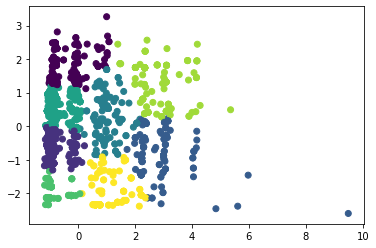

In [205]:
plt.scatter(x=result['x'], y=result['y'], c=pred)

In [206]:
centers = model.cluster_centers_
centers

array([[-0.52540305,  1.79586551],
       [-0.80952472, -0.62732249],
       [ 2.85389334, -0.78457212],
       [ 0.99323327,  0.24822889],
       [-0.69097908,  0.54264286],
       [-0.86448583, -2.04424542],
       [ 2.78563963,  1.23066037],
       [ 1.05263748, -1.95652096]])

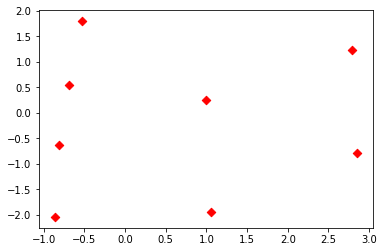

In [207]:
plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
plt.show()

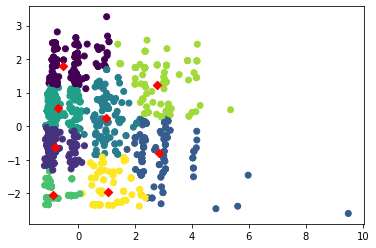

In [208]:
plt.scatter(x=result['x'], y=result['y'], c=pred) 

plt.scatter(x=centers[:,0], y=centers[:,1], marker='D', c='r')
plt.show() 

In [195]:
mac['cluster'] = pred
mac

,유통기한,국,살균,과일,주원료,드라이,신맛,고소한맛,단맛,탄산,cluster
0,365,1,11,20,30,41,51,60,72,81,2
1,60,0,11,21,30,40,51,60,70,80,4
2,30,1,10,20,30,41,51,60,71,80,1
3,365,3,11,20,32,41,50,60,71,80,2
4,30,2,10,20,30,40,51,60,72,80,1
...,...,...,...,...,...,...,...,...,...,...,...
1942,30,1,10,21,30,41,50,60,71,80,3
1943,30,2,10,20,32,41,50,60,71,80,0
1944,450,3,11,20,30,41,51,60,70,81,2
1945,365,3,11,20,32,41,50,60,70,81,2


In [112]:
mac['제품명'] = macmac['제품명']

In [113]:
mac

,국,살균,종류(동동주/막걸리/모주),과일,주원료,드라이,신맛,고소한맛,단맛,탄산,cluster,제품명
0,1,1,0,0,0,1,1,0,2,1,4,막이오름
1,0,1,0,1,0,0,1,0,0,0,2,서울곡주오란쥐
2,1,0,0,0,0,1,1,0,1,0,3,동네방네수지막걸리
3,0,0,2,1,0,1,1,0,0,0,4,청주신선주백주
4,3,1,0,0,2,1,0,0,1,0,5,고세이프리미엄순쌀막걸리(전량수출용)
...,...,...,...,...,...,...,...,...,...,...,...,...
2175,1,0,0,1,0,1,0,0,1,0,4,흑마늘막걸리_순천
2176,2,0,0,0,2,1,0,0,1,0,1,얼음골쌀생막걸리
2177,3,1,0,0,0,1,1,0,0,1,4,"국순당막걸리쌀(동남아시아수출용),알루미늄캔"
2178,3,1,0,0,2,1,0,0,0,1,5,"천억막걸리,CAN"


In [39]:
model = KMeans(n_clusters=10, random_state=0, algorithm='auto')
model.fit(mac)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [40]:
pred = model.predict(mac)
pred

array([1, 9, 0, ..., 1, 1, 3])

In [41]:
centers = model.cluster_centers_
centers

array([[ 3.04254423e+01,  1.24852570e+00,  5.13900590e-02,
         1.28053917e-01,  2.62847515e-01,  8.58466723e-01,
         6.63016007e-01,  5.14743050e-01,  4.71777591e-02,
         1.44313395e+00,  1.69334457e-01, -5.55111512e-16],
       [ 3.65717300e+02,  1.38396624e+00,  1.00000000e+00,
         1.18143460e-01,  4.85232068e-01,  6.91983122e-01,
         7.59493671e-01,  5.14767932e-01,  1.30801688e-01,
         1.30379747e+00,  2.53164557e-01,  1.00000000e+00],
       [ 9.65000000e+02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  3.33333333e-01,  0.00000000e+00,
         0.00000000e+00,  6.66666667e-01,  6.93889390e-18,
         1.33333333e+00,  0.00000000e+00,  4.00000000e+00],
       [ 9.02985075e+01,  5.97014925e-01,  8.35820896e-01,
         1.19402985e-01,  2.68656716e-01,  3.13432836e-01,
         4.77611940e-01,  6.56716418e-01,  1.19402985e-01,
         6.56716418e-01,  2.38805970e-01,  3.00000000e+00],
       [ 1.82500000e+03,  0.00000000e+00,  1.0000000

In [42]:
mac['cluster'] = pred
mac

,유통기한,국,살균,종류(동동주/막걸리/모주),과일,주원료,드라이,신맛,고소한맛,단맛,탄산,cluster
0,365,1,1,0,0,0,1,1,0,2,1,1
1,60,0,1,0,1,0,0,1,0,0,0,9
2,30,1,0,0,0,0,1,1,0,1,0,0
3,30,0,0,2,1,0,1,1,0,0,0,0
4,365,3,1,0,0,2,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2175,30,1,0,0,1,0,1,0,0,1,0,0
2176,30,2,0,0,0,2,1,0,0,1,0,0
2177,450,3,1,0,0,0,1,1,0,0,1,1
2178,365,3,1,0,0,2,1,0,0,0,1,1


In [115]:
mac.to_csv('C:/Users/CPBUserN/Desktop/cluster_6.csv', encoding='CP949', index=False)

In [38]:
mac = pd.read_csv('C:/Users/CPBUserN/Desktop/막걸리_최종.csv', encoding='CP949')
mac

,제품명,유통기한,국,살균,과일,주원료,드라이,신맛,고소한맛,단맛,탄산
0,막이오름,365,1,11,20,30,41,51,60,72,81
1,서울곡주오란쥐,60,0,11,21,30,40,51,60,70,80
2,동네방네수지막걸리,30,1,10,20,30,41,51,60,71,80
3,고세이프리미엄순쌀막걸리(전량수출용),365,3,11,20,32,41,50,60,71,80
4,대대포13,30,2,10,20,30,40,51,60,72,80
...,...,...,...,...,...,...,...,...,...,...,...
1942,흑마늘막걸리_순천,30,1,10,21,30,41,50,60,71,80
1943,얼음골쌀생막걸리,30,2,10,20,32,41,50,60,71,80
1944,"국순당막걸리쌀(동남아시아수출용),알루미늄캔",450,3,11,20,30,41,51,60,70,81
1945,"천억막걸리,CAN",365,3,11,20,32,41,50,60,70,81


In [39]:
clust = pd.read_csv('C:/Users/CPBUserN/Desktop/군집.csv', encoding='CP949')
clust

,Unnamed: 0,Var1,Var2,Freq
0,1,10,(땅콩)생막걸리,1
1,2,11,12월의양조장_10도,1
2,3,11,12월의양조장_14도,1
3,4,11,12월의양조장_8도,1
4,5,13,337누룽지생술,1
...,...,...,...,...
1942,1943,11,흥흥흥,1
1943,1944,11,흥흥흥꿀막걸리,1
1944,1945,11,흥흥흥비트막걸리,1
1945,1946,2,희양산막걸리15도,1


In [40]:
mac_clust = pd.merge(mac, clust, left_on='제품명', right_on='Var2')
mac_clust

,제품명,유통기한,국,살균,과일,주원료,드라이,신맛,고소한맛,단맛,탄산,Unnamed: 0,Var1,Var2,Freq
0,막이오름,365,1,11,20,30,41,51,60,72,81,443,1,막이오름,1
1,서울곡주오란쥐,60,0,11,21,30,40,51,60,70,80,785,2,서울곡주오란쥐,1
2,동네방네수지막걸리,30,1,10,20,30,41,51,60,71,80,389,3,동네방네수지막걸리,1
3,고세이프리미엄순쌀막걸리(전량수출용),365,3,11,20,32,41,50,60,71,80,90,4,고세이프리미엄순쌀막걸리(전량수출용),1
4,대대포13,30,2,10,20,30,40,51,60,72,80,323,5,대대포13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,흑마늘막걸리_순천,30,1,10,21,30,41,50,60,71,80,1938,3,흑마늘막걸리_순천,1
1943,얼음골쌀생막걸리,30,2,10,20,32,41,50,60,71,80,1051,13,얼음골쌀생막걸리,1
1944,"국순당막걸리쌀(동남아시아수출용),알루미늄캔",450,3,11,20,30,41,51,60,70,81,157,6,"국순당막걸리쌀(동남아시아수출용),알루미늄캔",1
1945,"천억막걸리,CAN",365,3,11,20,32,41,50,60,70,81,1624,4,"천억막걸리,CAN",1


In [41]:
name = mac_clust['제품명']
name

0                          막이오름
1                       서울곡주오란쥐
2                     동네방네수지막걸리
3           고세이프리미엄순쌀막걸리(전량수출용)
4                         대대포13
                 ...           
1942                  흑마늘막걸리_순천
1943                   얼음골쌀생막걸리
1944    국순당막걸리쌀(동남아시아수출용),알루미늄캔
1945                  천억막걸리,CAN
1946                이천쌀생막걸리,수출용
Name: 제품명, Length: 1947, dtype: object

In [42]:
mac_clust = mac_clust[['과일', '드라이', '신맛', '단맛', '고소한맛', 'Var1', '제품명']]
mac_clust

,과일,드라이,신맛,단맛,고소한맛,Var1,제품명
0,20,41,51,72,60,1,막이오름
1,21,40,51,70,60,2,서울곡주오란쥐
2,20,41,51,71,60,3,동네방네수지막걸리
3,20,41,50,71,60,4,고세이프리미엄순쌀막걸리(전량수출용)
4,20,40,51,72,60,5,대대포13
...,...,...,...,...,...,...,...
1942,21,41,50,71,60,3,흑마늘막걸리_순천
1943,20,41,50,71,60,13,얼음골쌀생막걸리
1944,20,41,51,70,60,6,"국순당막걸리쌀(동남아시아수출용),알루미늄캔"
1945,20,41,50,70,60,4,"천억막걸리,CAN"


In [43]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import matplotlib

In [44]:
np.random.seed(3)
tf.random.set_seed(3)

matplotlib.rcParams['font.family'] = 'Malgun Gothic'

In [66]:
# 데이터 분류
dataset = mac_clust.values
X = dataset[:,0:5].astype(float)
Y_obj = dataset[:,5:6]

# 문자열을 숫자로 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y_encoded = tf.keras.utils.to_categorical(Y)

C:\BigData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\BigData\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
Y_encoded

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [71]:
# 모델의 설정
model = Sequential()
model.add(Dense(50,  input_dim=5, activation='sigmoid'))
model.add(Dense(40, activation='relu'))
model.add(Dense(17, activation='softmax'))

In [72]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

In [73]:
# 모델 실행
model.fit(X, Y_encoded, epochs=15, batch_size=1)
model.save('predict goods.h5')

ValueError: A target array with shape (1947, 20) was passed for an output of shape (None, 17) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.

In [ ]:
model.save('predict goods.h5')

In [58]:
def create_model(weights_path=None):
       model = Sequential()
       model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', padding="same", input_shape=(1, 1366, 96)))
       model.add(Conv2D(64, (3, 3), activation='relu', dim_ordering="th"))
       model.add(MaxPooling2D(pool_size=(2, 2)))
       model.add(Flatten())
       model.add(Dense(128, activation='relu'))
       model.add(Dr1opout(0.1))
       model.add(Dense(64, activation='relu'))
       model.add(Dropout(0.1))
       model.add(Dense(16, activation='relu'))
       model.add(Dense(2, activation='softmax'))
       if weights_path:
           model.load_weights(weights_path)
       return model

model = create_model()
model.compile(loss=keras.losses.categorical_crossentropy,
                 optimizer=keras.optimizers.SGD(lr=0.01),
                 metrics=['accuracy'])
history = model.fit(X_train, Y_train,
         batch_size=32,
         epochs=100,
         verbose=1,
         validation_data=(X_test, Y_test))

NameError: name 'Conv2D' is not defined